In [ ]:
#1. Importing data
#2. DataEDA
#3. Data Preprocessing
#4. Data Splitting
4

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import  datasets, model_selection, linear_model, metrics, preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

In [4]:
# 1. Importing data  
train_df = pd.read_csv("datasets/titanic/train.csv")
test_df = pd.read_csv("datasets/titanic/test.csv")
df = pd.concat([train_df, test_df])

In [5]:
# 2. EDA
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


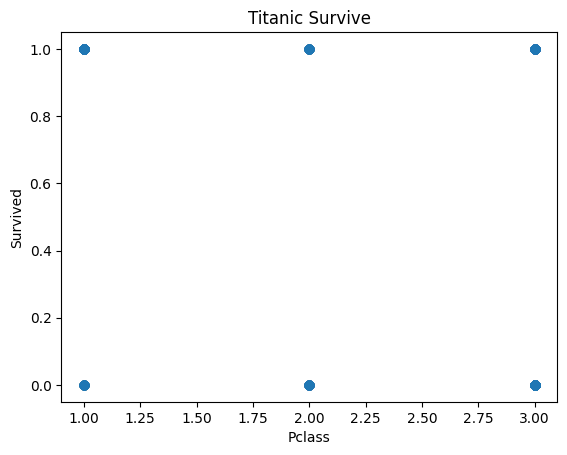

In [12]:
# Visual relationship between 

# Scatter plot
plt.scatter(train_df['Pclass'], train_df['Survived'])
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.title('Titanic Survive')
plt.show()

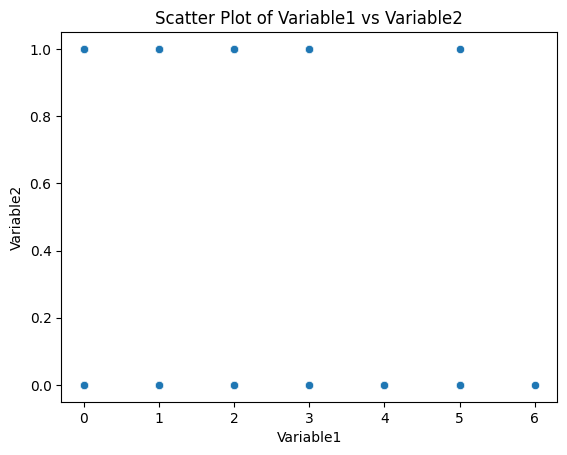

In [14]:
sns.scatterplot(x=train_df['Parch'], y=train_df['Survived'], data=df)
plt.xlabel('Variable1')
plt.ylabel('Variable2')
plt.title('Scatter Plot of Variable1 vs Variable2')
plt.show()

In [53]:
sns.barplot(x="Pclass", y="Survived", data=train_df)


<Axes: xlabel='Pclass', ylabel='Survived'>

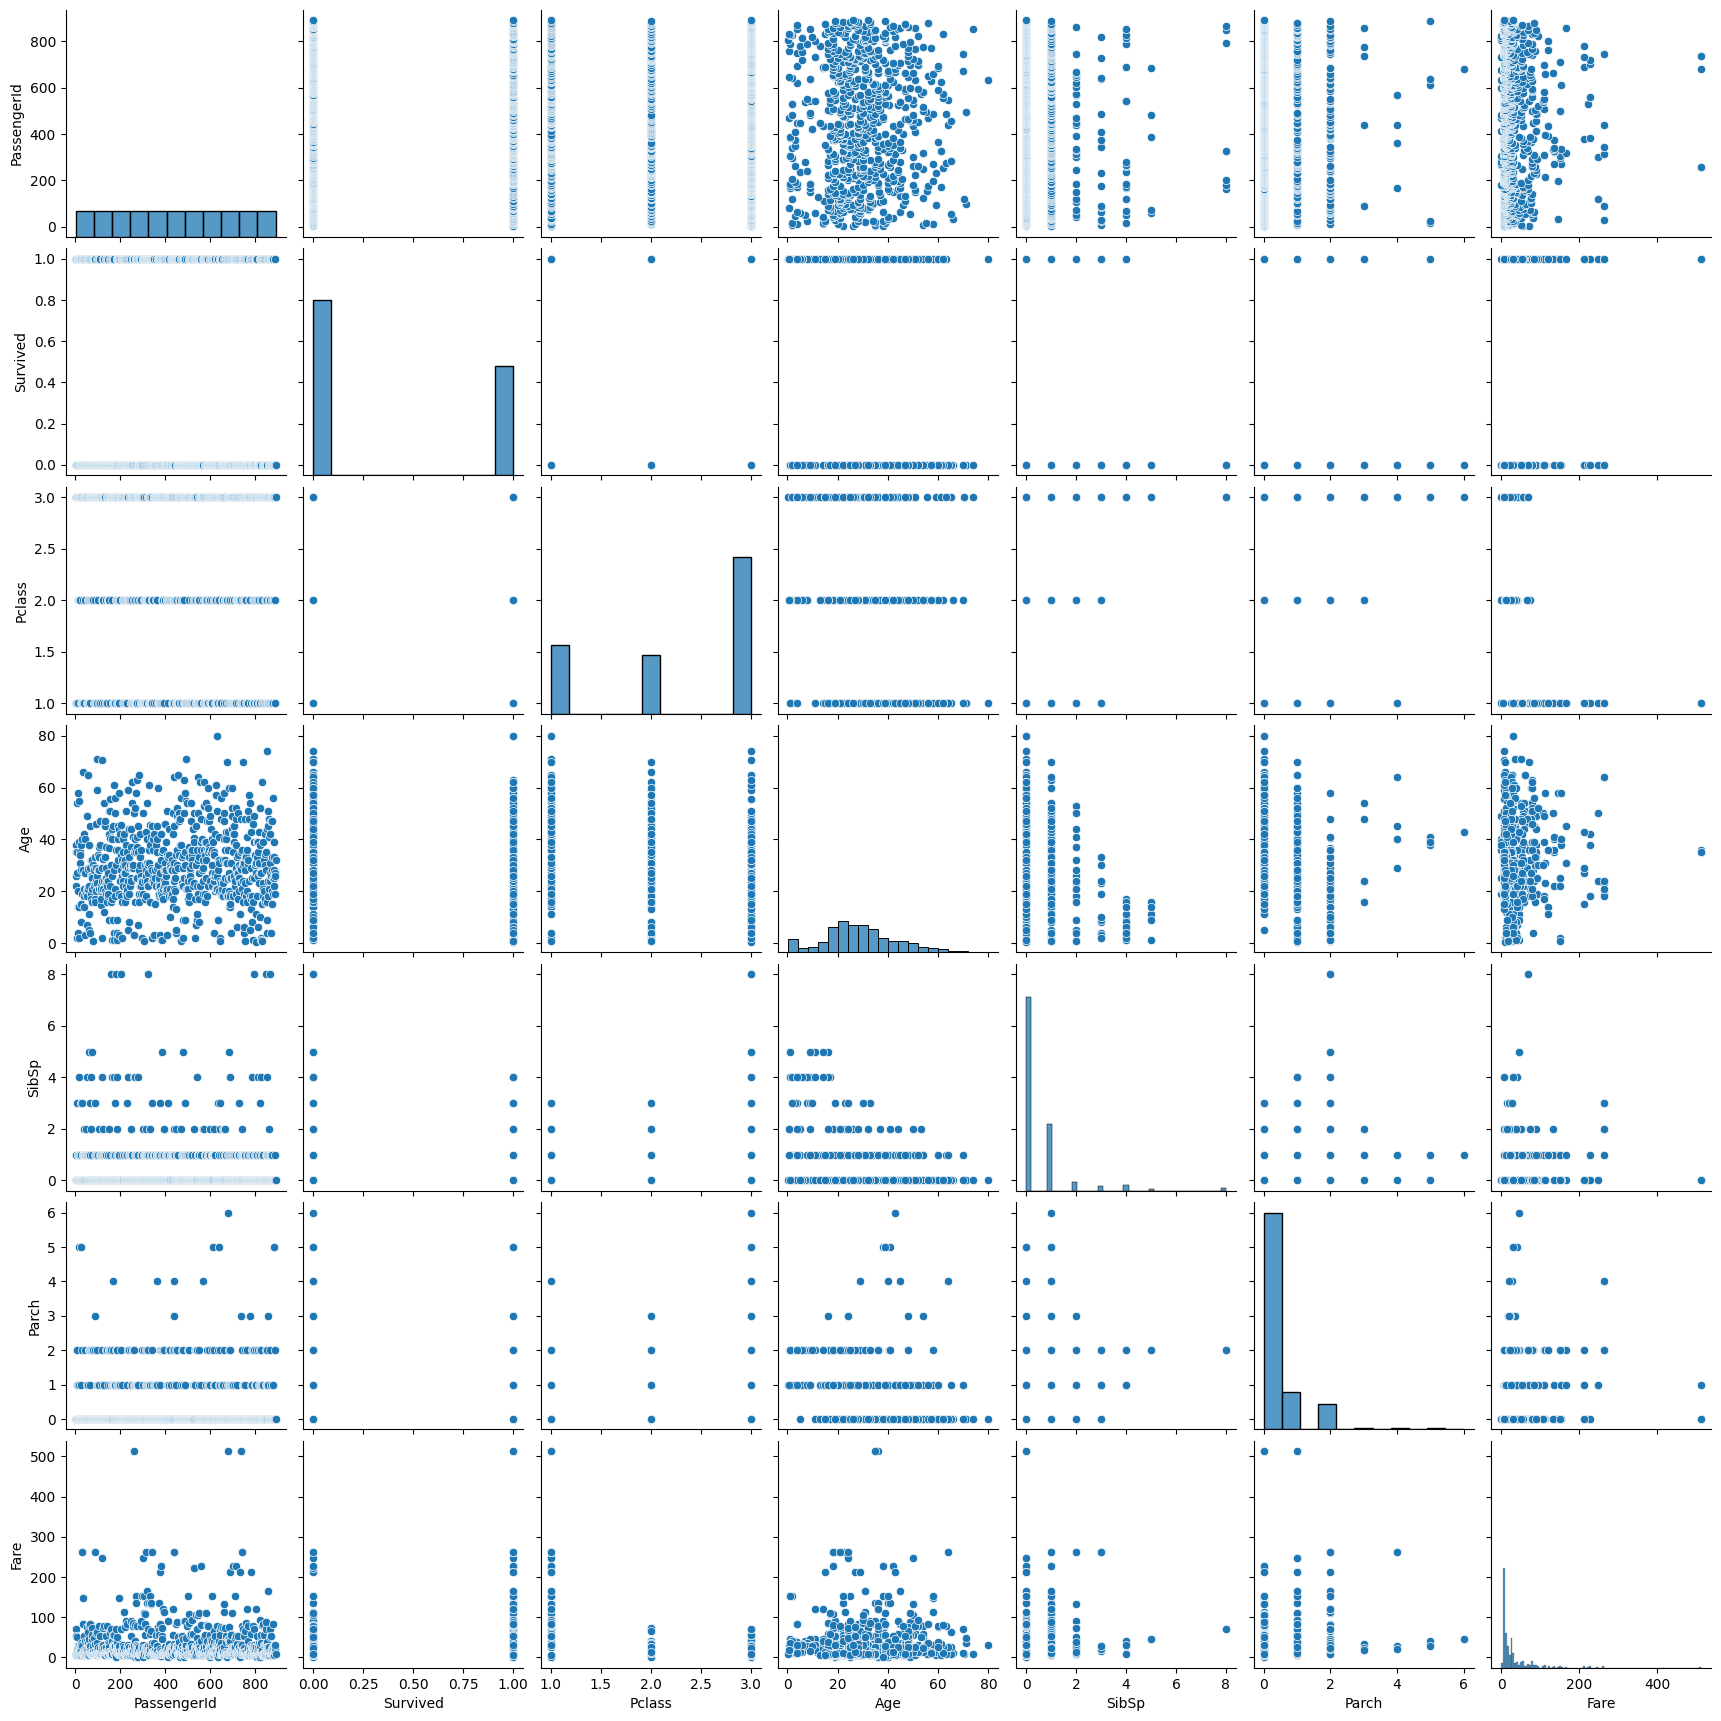

In [17]:
sns.pairplot(train_df)
plt.show()

C:\Users\suhaimi\AppData\Local\Temp\ipykernel_21660\3472239162.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_df['Sex'] = temp_df['Sex'].replace(['female','male'],[0,1])
C:\Users\suhaimi\AppData\Local\Temp\ipykernel_21660\3472239162.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_df['Embarked'] = temp_df['Embarked'].replace(['C','Q','S'],[0,1,2])


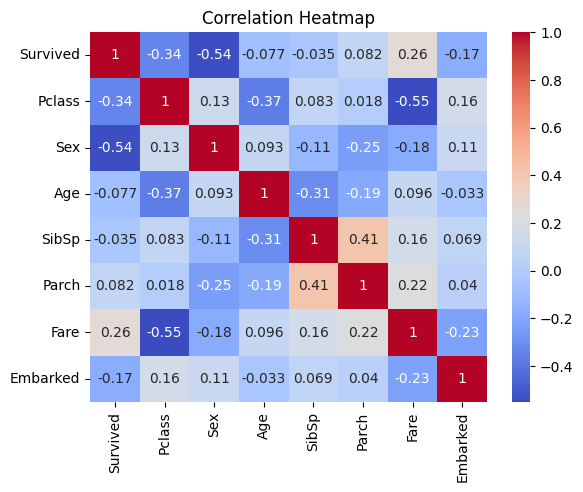

In [30]:
temp_df = train_df.drop('Name', axis=1)
temp_df = temp_df.drop('Ticket', axis=1)
temp_df = temp_df.drop('Cabin', axis=1)
temp_df = temp_df.drop('PassengerId', axis=1)
temp_df['Sex'] = temp_df['Sex'].replace(['female','male'],[0,1])
temp_df['Embarked'] = temp_df['Embarked'].replace(['C','Q','S'],[0,1,2])
# temp_df.head()
corr = temp_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Percentage of PClass = 1 who survived:  67.09
Percentage of PClass = 1 who survived:  80.0
Percentage of PClass = 1 who survived:  50.0


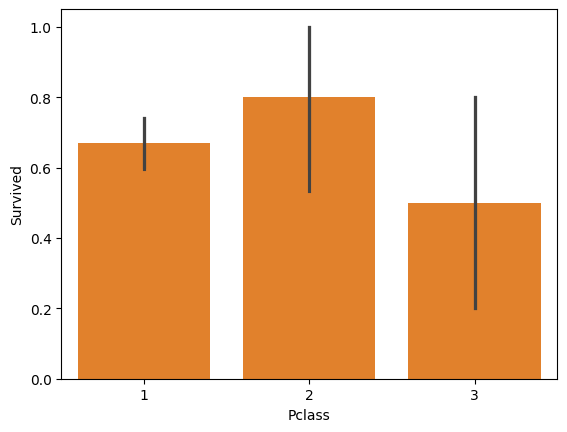

In [58]:
sns.barplot(x="Pclass", y="Survived", data=train_df)
survived_1 = train_df["Survived"][train_df["Pclass"]==1].value_counts(normalize=True)[1]
survived_2 = train_df["Survived"][train_df["Pclass"]==2].value_counts(normalize=True)[1]
survived_3 = train_df["Survived"][train_df["Pclass"]==3].value_counts(normalize=True)[1]

print("Percentage of PClass = 1 who survived: ", round(survived_1*100,2))
print("Percentage of PClass = 1 who survived: ", round(survived_2*100,2))
print("Percentage of PClass = 1 who survived: ", round(survived_3*100,2))
plt.show()

In [ ]:
a = pd.cut(train_df[])

In [32]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
train_df.duplicated().sum()

np.int64(0)

In [36]:
train_df = train_df.dropna()
train_df.isna().sum()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [44]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(temp_df, temp_df['Survived'], test_size=0.8, random_state=42)

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [46]:
test_predictions = dt.predict(x_test)

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_predictions)
print(cm)


[[436   0]
 [  0 277]]


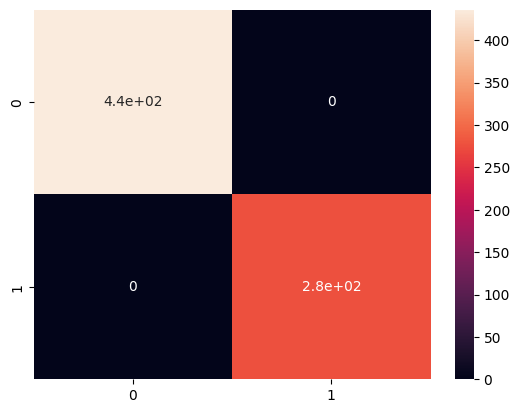

In [49]:
sns.heatmap(cm, annot=True)
plt.show()

In [60]:
import warnings
warnings.filterwarnings('ignore')

#visualise the relationship of Percentage of Ages with survived
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf] #9
labels = ["Unknown", "Baby", "Child", "Teenager", "Student", "Young Adul", "Adult", "Senior"]
df["AgeGroup"] = pd.cut(train_df["Age"], bins=bins, labels=labels)

In [62]:
# Data processing
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [74]:
train_df = train_df.drop('Cabin', axis=1)
test_df = test_df.drop('Cabin', axis=1)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
